In [41]:
import numpy as np
import pandas as pd

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/marcopeix/AppliedTimeSeriesAnalysisWithPython/main/data/jj.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [43]:
df.describe()

,data
count,84.000000
mean,4.799762
std,4.309991
min,0.440000
25%,1.247500
50%,3.510000
75%,7.132500
max,16.200000


In [44]:
train = df[:-4]
test = df[-4:]

In [45]:
hist_mean = np.mean(train['data'])
print(hist_mean)

4.308499987499999


In [46]:
print(test)

          date   data
80  1980-01-01  16.20
81  1980-04-01  14.67
82  1980-07-02  16.02
83  1980-10-01  11.61


In [47]:
test.loc[:,'pred_mean'] = hist_mean

/var/folders/r6/ll0mn_f10xv5sjtcfcsw16880000gn/T/ipykernel_49533/4133429516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'pred_mean'] = hist_mean


In [48]:
def mape(y_actual, y_pred): ### define MAPE - Mean absolute percentage error
    return np.mean(np.abs(y_actual-y_pred)/y_actual) * 100

In [49]:
mape_hist_mean = mape(test['data'], test['pred_mean'])
print(mape_hist_mean)

70.00752579965119


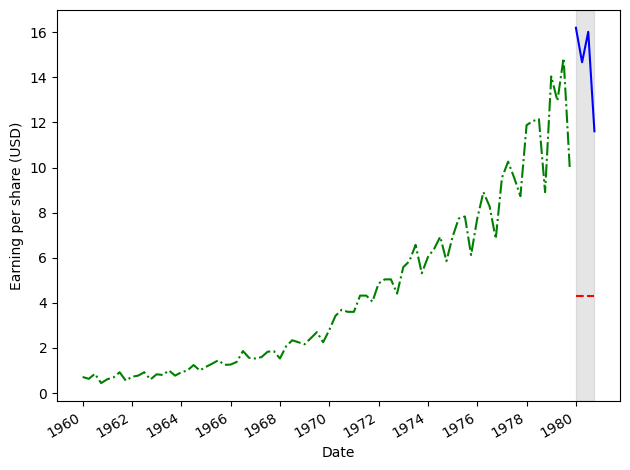

In [50]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(train['date'], train['data'],'g-.', label= "Train")
ax.plot(test['date'], test['data'],'b-', label= "Test")
ax.plot(test['date'], test['pred_mean'],'r--', label= "Pred")
ax.set_xlabel("Date")
ax.set_ylabel("Earning per share (USD)")
ax.axvspan(80, 83, color='#808080', alpha=0.2) # alpha is opacity param
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()

Last year Mean

In [51]:
## taking last year mean now
hist_year_mean = np.mean(train.data[-4:])
print(hist_year_mean)

12.96


In [52]:
test.loc[:, "pred_last_year_mean"] = hist_year_mean

/var/folders/r6/ll0mn_f10xv5sjtcfcsw16880000gn/T/ipykernel_49533/1341158835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, "pred_last_year_mean"] = hist_year_mean


In [53]:
mape_last_year_mean = mape(test["data"],test["pred_last_year_mean"])
print(mape_last_year_mean)

15.5963680725103


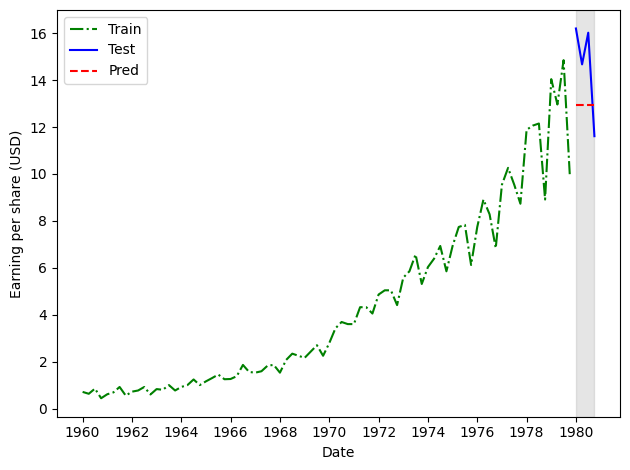

In [54]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(train['date'], train['data'],'g-.', label= "Train")
ax.plot(test['date'], test['data'],'b-', label= "Test")
ax.plot(test['date'], test['pred_last_year_mean'],'r--', label= "Pred")
ax.set_xlabel("Date")
ax.set_ylabel("Earning per share (USD)")
ax.axvspan(80, 83, color='#808080', alpha=0.2) # alpha is opacity param
ax.legend(loc=2)
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate
plt.tight_layout()
plt.savefig('/Users/pulin05/Downloads/CH02_F07_peixeiro.png', dpi=300)

Predict last know value

In [55]:
last = train.data.iloc[-1]
print(last)

9.99


In [56]:
test.loc[:, "pred_last"] = last
test

/var/folders/r6/ll0mn_f10xv5sjtcfcsw16880000gn/T/ipykernel_49533/762887110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, "pred_last"] = last


,date,data,pred_mean,pred_last_year_mean,pred_last
80,1980-01-01,16.20,4.3085,12.96,9.99
81,1980-04-01,14.67,4.3085,12.96,9.99
82,1980-07-02,16.02,4.3085,12.96,9.99
83,1980-10-01,11.61,4.3085,12.96,9.99


In [57]:
mape_last = mape(test['data'],test['pred_last'])
mape_last

30.457277908606535

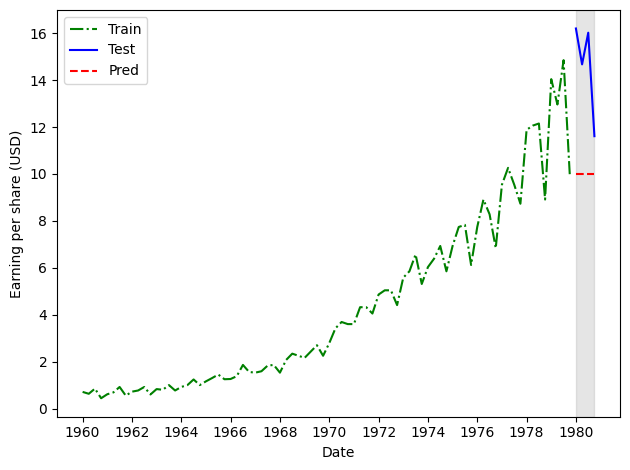

In [58]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(train['date'], train['data'],'g-.', label= "Train")
ax.plot(test['date'], test['data'],'b-', label= "Test")
ax.plot(test['date'], test['pred_last'],'r--', label= "Pred")
ax.set_xlabel("Date")
ax.set_ylabel("Earning per share (USD)")
ax.axvspan(80, 83, color='#808080', alpha=0.2) # alpha is opacity param
ax.legend(loc=2)
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate
plt.tight_layout()

Naive seasonal forecast

In [61]:
test.loc[:, 'pred_last_season'] = train['data'][-4:].values
test

,date,data,pred_mean,pred_last_year_mean,pred_last,pred_last_season
80,1980-01-01,16.20,4.3085,12.96,9.99,14.04
81,1980-04-01,14.67,4.3085,12.96,9.99,12.96
82,1980-07-02,16.02,4.3085,12.96,9.99,14.85
83,1980-10-01,11.61,4.3085,12.96,9.99,9.99


In [62]:
mape_naive_seasonal = mape(test['data'], test['pred_last_season'])
mape_naive_seasonal

11.561658552433654